Inayah Nur Ilahi S.R (H071201026)

Lakukan import Library Pandas dan Library Numpy

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Panggil file (load dataset) dengan format .csv untuk dataset mengenai HOUSE PRICE PREDICTION yang sudah diunduh dari Kaggle, dan akan disimpan di dalam dataframe df. Lalu tampilkan 5 baris awal dataset dengan function head()

In [ ]:
df  = pd.read_csv('/content/minihomeprices.csv')
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


Hitunglah ukuran (jumlah baris dan kolom) dari dataset. Dengan menggunakan method function

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 320.0 bytes


Method "describe" secara otomatis melakukan komputasi statistik untuk semua continous variable. Secara default "describe" melakukan ignore terhadap variabel bertype objek.

Komputasi statistik yang dilakukan terdiri dari: count, mean, std, min, max, 25%, 75%, max.

Latihan: Gunakan method describe pada dataset yang sudah di load untuk semua continous variabel. (Dataset Iris.csv)

kita akan melihat informasi-informasi statistik dasar yang ada pada data. Disini kita bisa melihat nilai minimum,maximal,standar deviasi, nilai tengah

In [ ]:
df.describe().style.background_gradient(cmap='CMRmap')

,area,bedrooms,age,price
count,6.000000,5.000000,6.000000,6.000000
mean,3416.666667,4.200000,16.500000,648333.333333
std,587.934237,1.303840,8.288546,109117.673484
min,2600.000000,3.000000,8.000000,550000.000000
25%,3050.000000,3.000000,9.750000,572500.000000
50%,3400.000000,4.000000,16.500000,602500.000000
75%,3900.000000,5.000000,19.500000,722500.000000
max,4100.000000,6.000000,30.000000,810000.000000


# DATA ANALYSIS

kita melihat nilai null yang ada,
bisa dilihat  hanya bedrooms yang bernilai null

In [ ]:
df.isna().sum()


area        0
bedrooms    1
age         0
price       0
dtype: int64

Disini kita mengubah nilai null menjadi nilai median


di sini kita juga bisa menggunakan inplace=True. keduanya valid untuk memperbarui bingkai data

In [ ]:
df['bedrooms'] = df['bedrooms'].fillna( df['bedrooms'].mean() )
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


# DATA VISUALIZATION

Nan disini kita bisa melihat barplot atau diagramm pada dataset 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


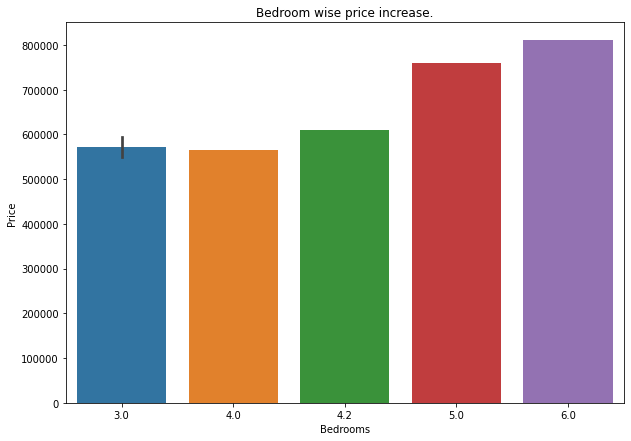

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Bedroom wise price increase.")

sns.barplot('bedrooms', 'price', data=df)
plt.xlabel('Bedrooms', )
plt.ylabel('Price')
plt.show()

selain itu kita juga bisa membuat scatter plot (diagarm yang berpencar)

Di sini kita dapat melihat kamar tidur dan harga berhubungan secara linier, Harga Rumah meningkat jika ukuran kamar tidur akan meningkat.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


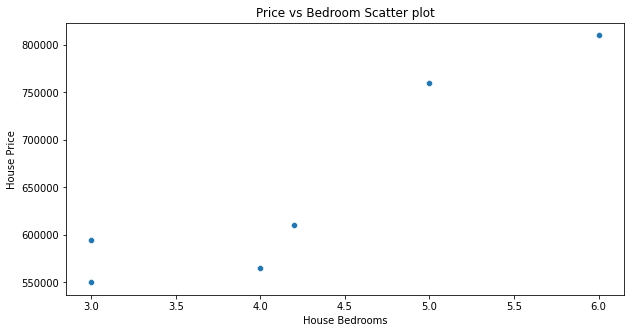

In [ ]:
plt.figure(figsize=(10, 5))

sns.scatterplot('bedrooms', 'price',data=df)
plt.title("Price vs Bedroom Scatter plot")

plt.xlabel("House Bedrooms")
plt.ylabel('House Price')
plt.show()

<Figure size 720x504 with 0 Axes>

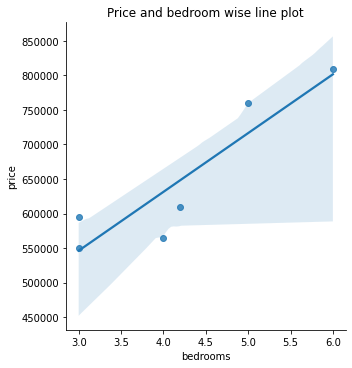

In [ ]:
plt.figure(figsize=(10, 7))

sns.lmplot(x="bedrooms", y="price", data=df);
plt.title("Price and bedroom wise line plot")
plt.show()

# Model Implementing

pertama kita melakukan import model

In [ ]:
from sklearn.linear_model import LinearRegression

Sekarang, Buat instance model dari kelas LinearRegression

In [ ]:
mdl = LinearRegression()

Sebelum memasang model, buat X dan y untuk pemasangan model

In [ ]:
#  Tetapkan variabel dependen dan independen

X = df.drop(['price'], axis=1)
y = df['price']

In [ ]:
# mengubah tpe data bedroom dari float menjadi int

df['bedrooms'] = df['bedrooms'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   area      6 non-null      int64
 1   bedrooms  6 non-null      int64
 2   age       6 non-null      int64
 3   price     6 non-null      int64
dtypes: int64(4)
memory usage: 320.0 bytes


In [ ]:
#  melihat variabel
print(X)
print("-" * 25)
print(y)

   area  bedrooms  age
0  2600       3.0   20
1  3000       4.0   15
2  3200       4.2   18
3  3600       3.0   30
4  4000       5.0    8
5  4100       6.0    8
-------------------------
0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64



Sekarang, Kami akan menyesuaikan data fitting the training and testing data

In [ ]:
#  Fitting Model

mdl.fit( X, y  )

LinearRegression()

PREDICTION

In [ ]:
# Sekarang sesuaikan pengujian prediksi

mdl.predict([[ 4000, 2, 50 ]])
# 
tunjukkan harga rumah di sini

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([551989.04870256])

menunjukkan Coeficient

In [ ]:
mdl.coef_

array([  116.66950551, 18756.28806982, -3675.75111708])

Show intecept

In [ ]:
mdl.intercept_

231586.00639409182

In [ ]:
#  know score 
score = mdl.score( X, y )

print(score * 100)

95.40926625396438
